In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.10.4


In [2]:
sx=10
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                    )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


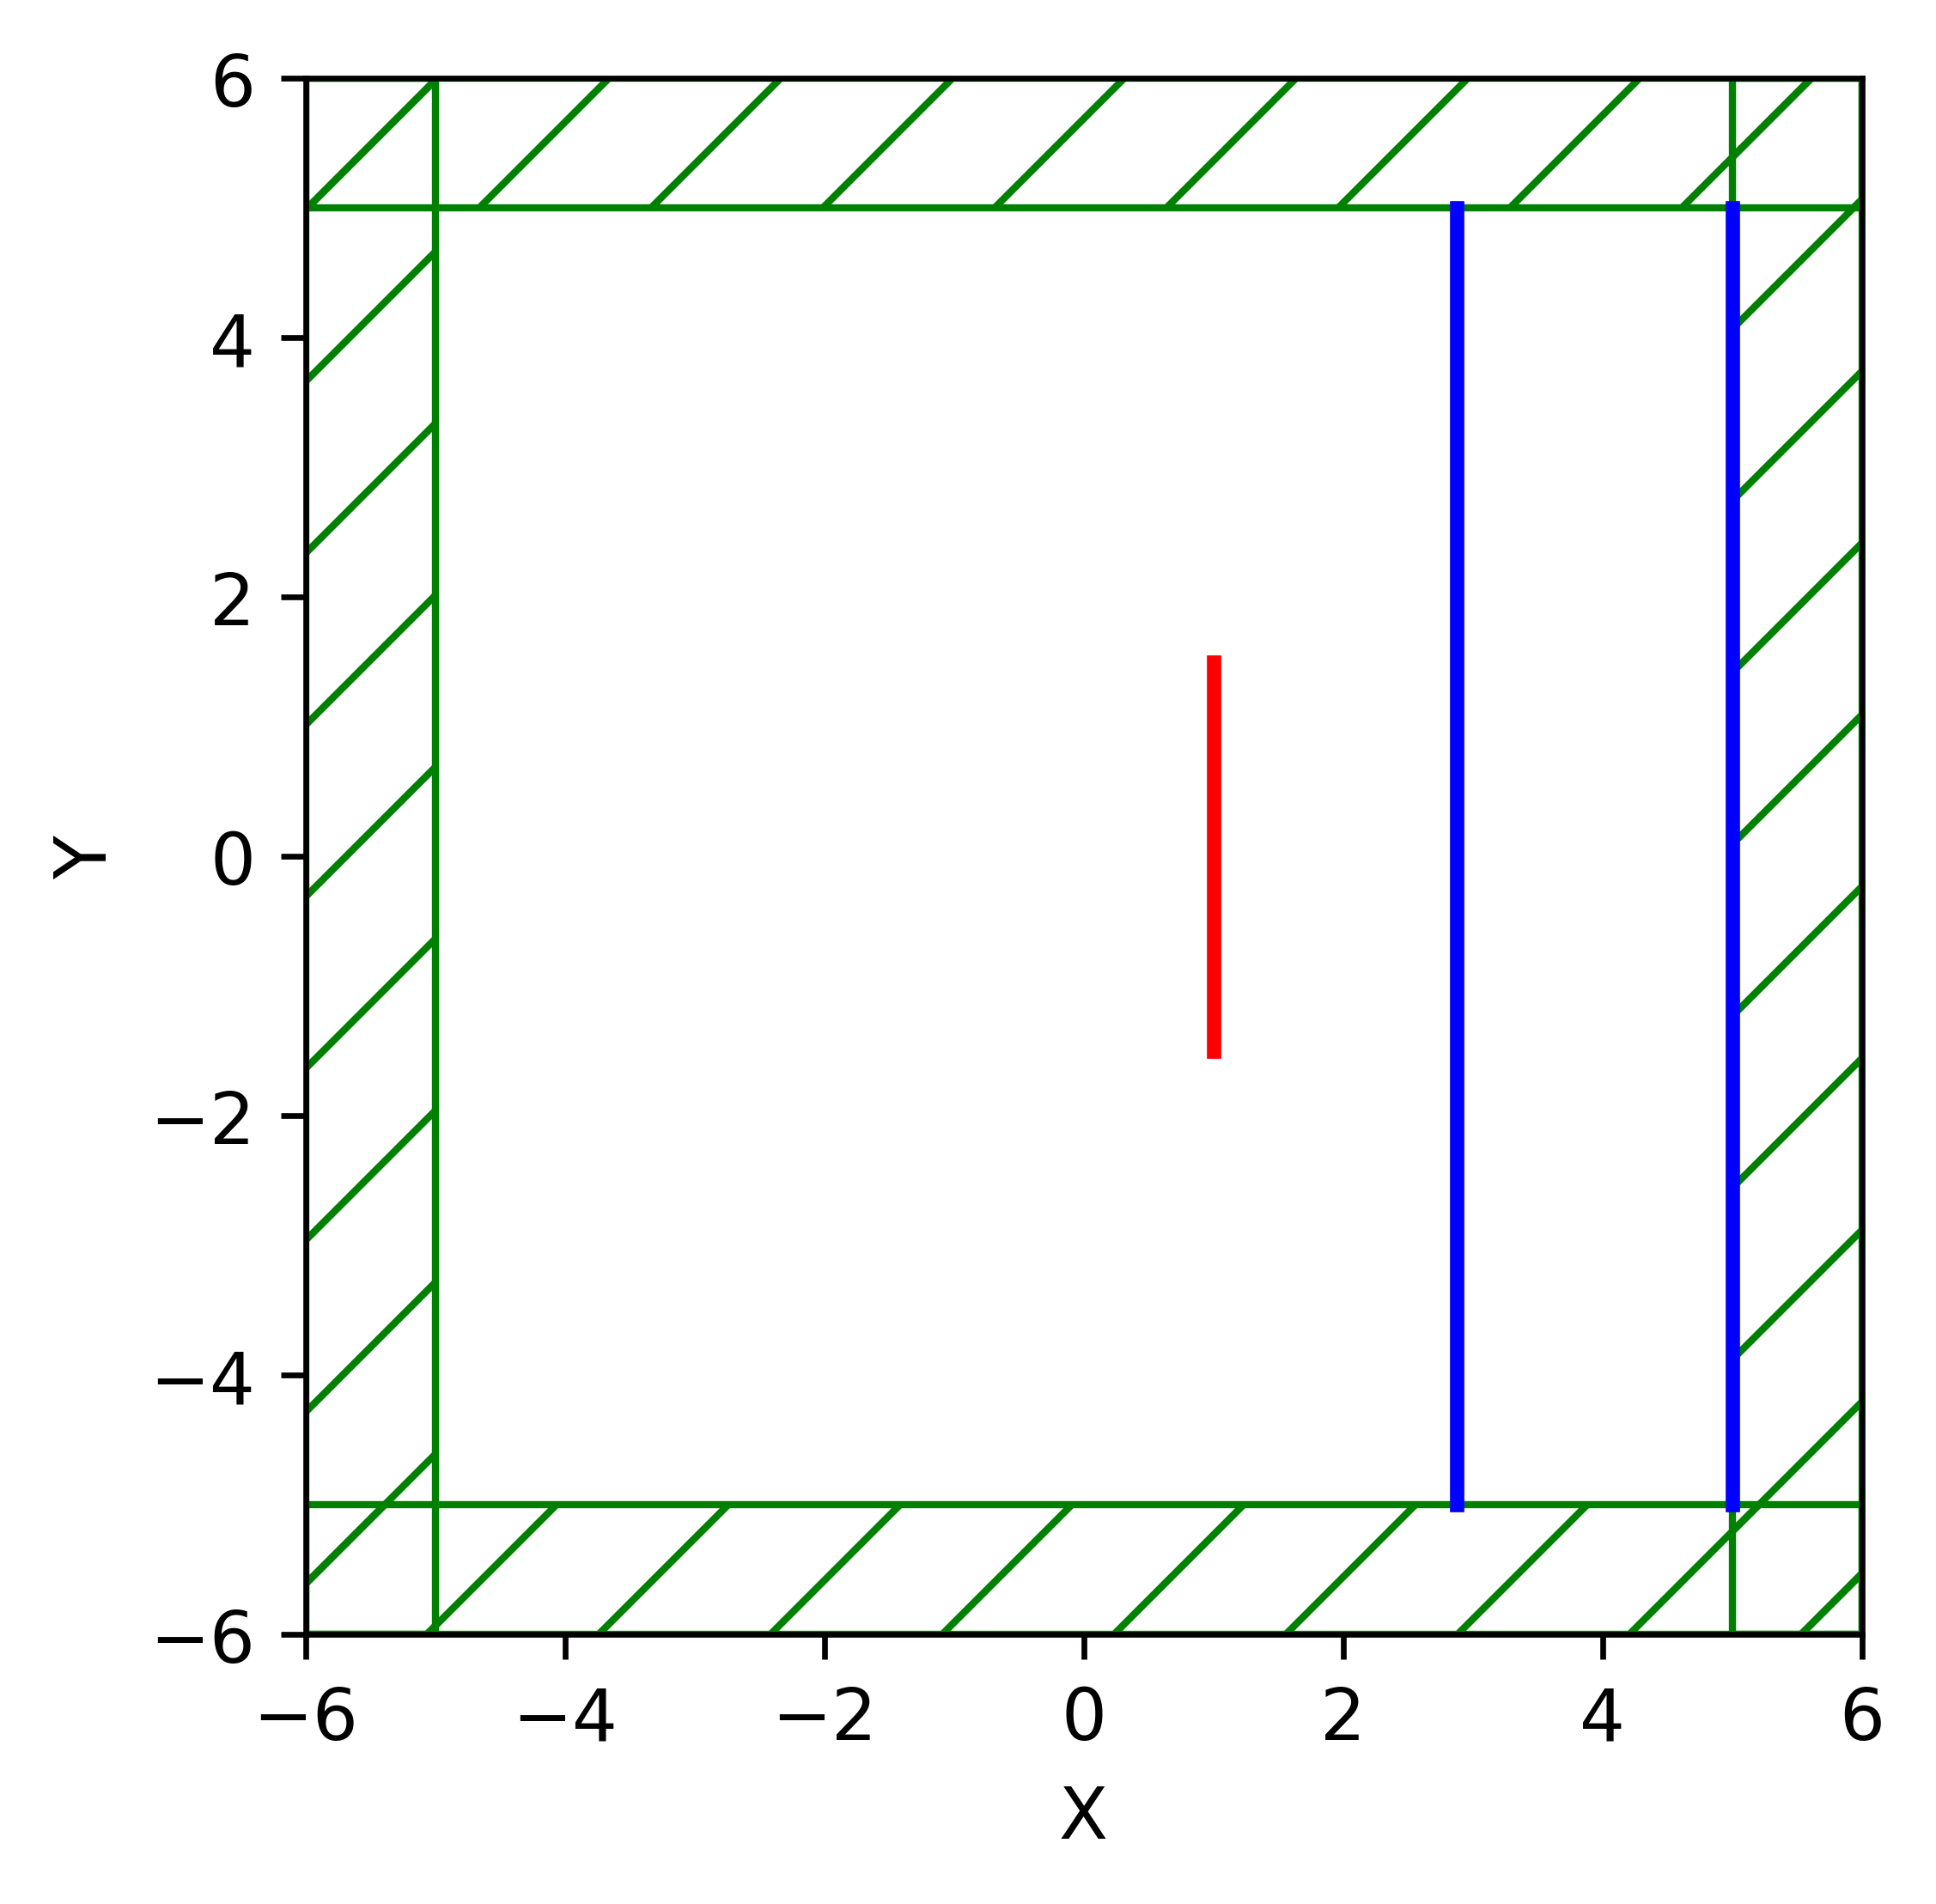

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.2*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                         )

refl_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                     )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                         )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                     )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000929117 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.753915 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 1027 (time=10.27), 0.00389636 s/step
on time step 1904 (time=19.04), 0.00459224 s/step
on time step 2858 (time=28.58), 0.00419359 s/step
on time step 4063 (time=40.63), 0.0033203 s/step
field decay(t = 50.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 5253 (time=52.53), 0.00336549 s/step
on time step 6443 (time=64.43), 0.00336816 s/step
on time step 7491 (time=74.91), 0.00381896 s/step
on time step 8494 (time=84.94), 0.00398858 s/step
on time step 9569 (time=95.69), 0.0037225 s/step
field decay(t = 100.01): 6.323761485647929e-14 / 0.39441514008126954 =

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
#no_ARC_ttran_flux + no_ARC_rrefl_flux

-----------
Initializing structure...
time for choose_chunkdivision = 0.000548124 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.58431 s
lorentzian susceptibility: frequency=2.56968, gamma=1.44131
lorentzian susceptibility: frequency=1.73, gamma=5
lorentzian susceptibility: frequency=2.76, gamma=0.126
lorentzian susceptibility: frequency=3.64, gamma=0
-----------
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
  

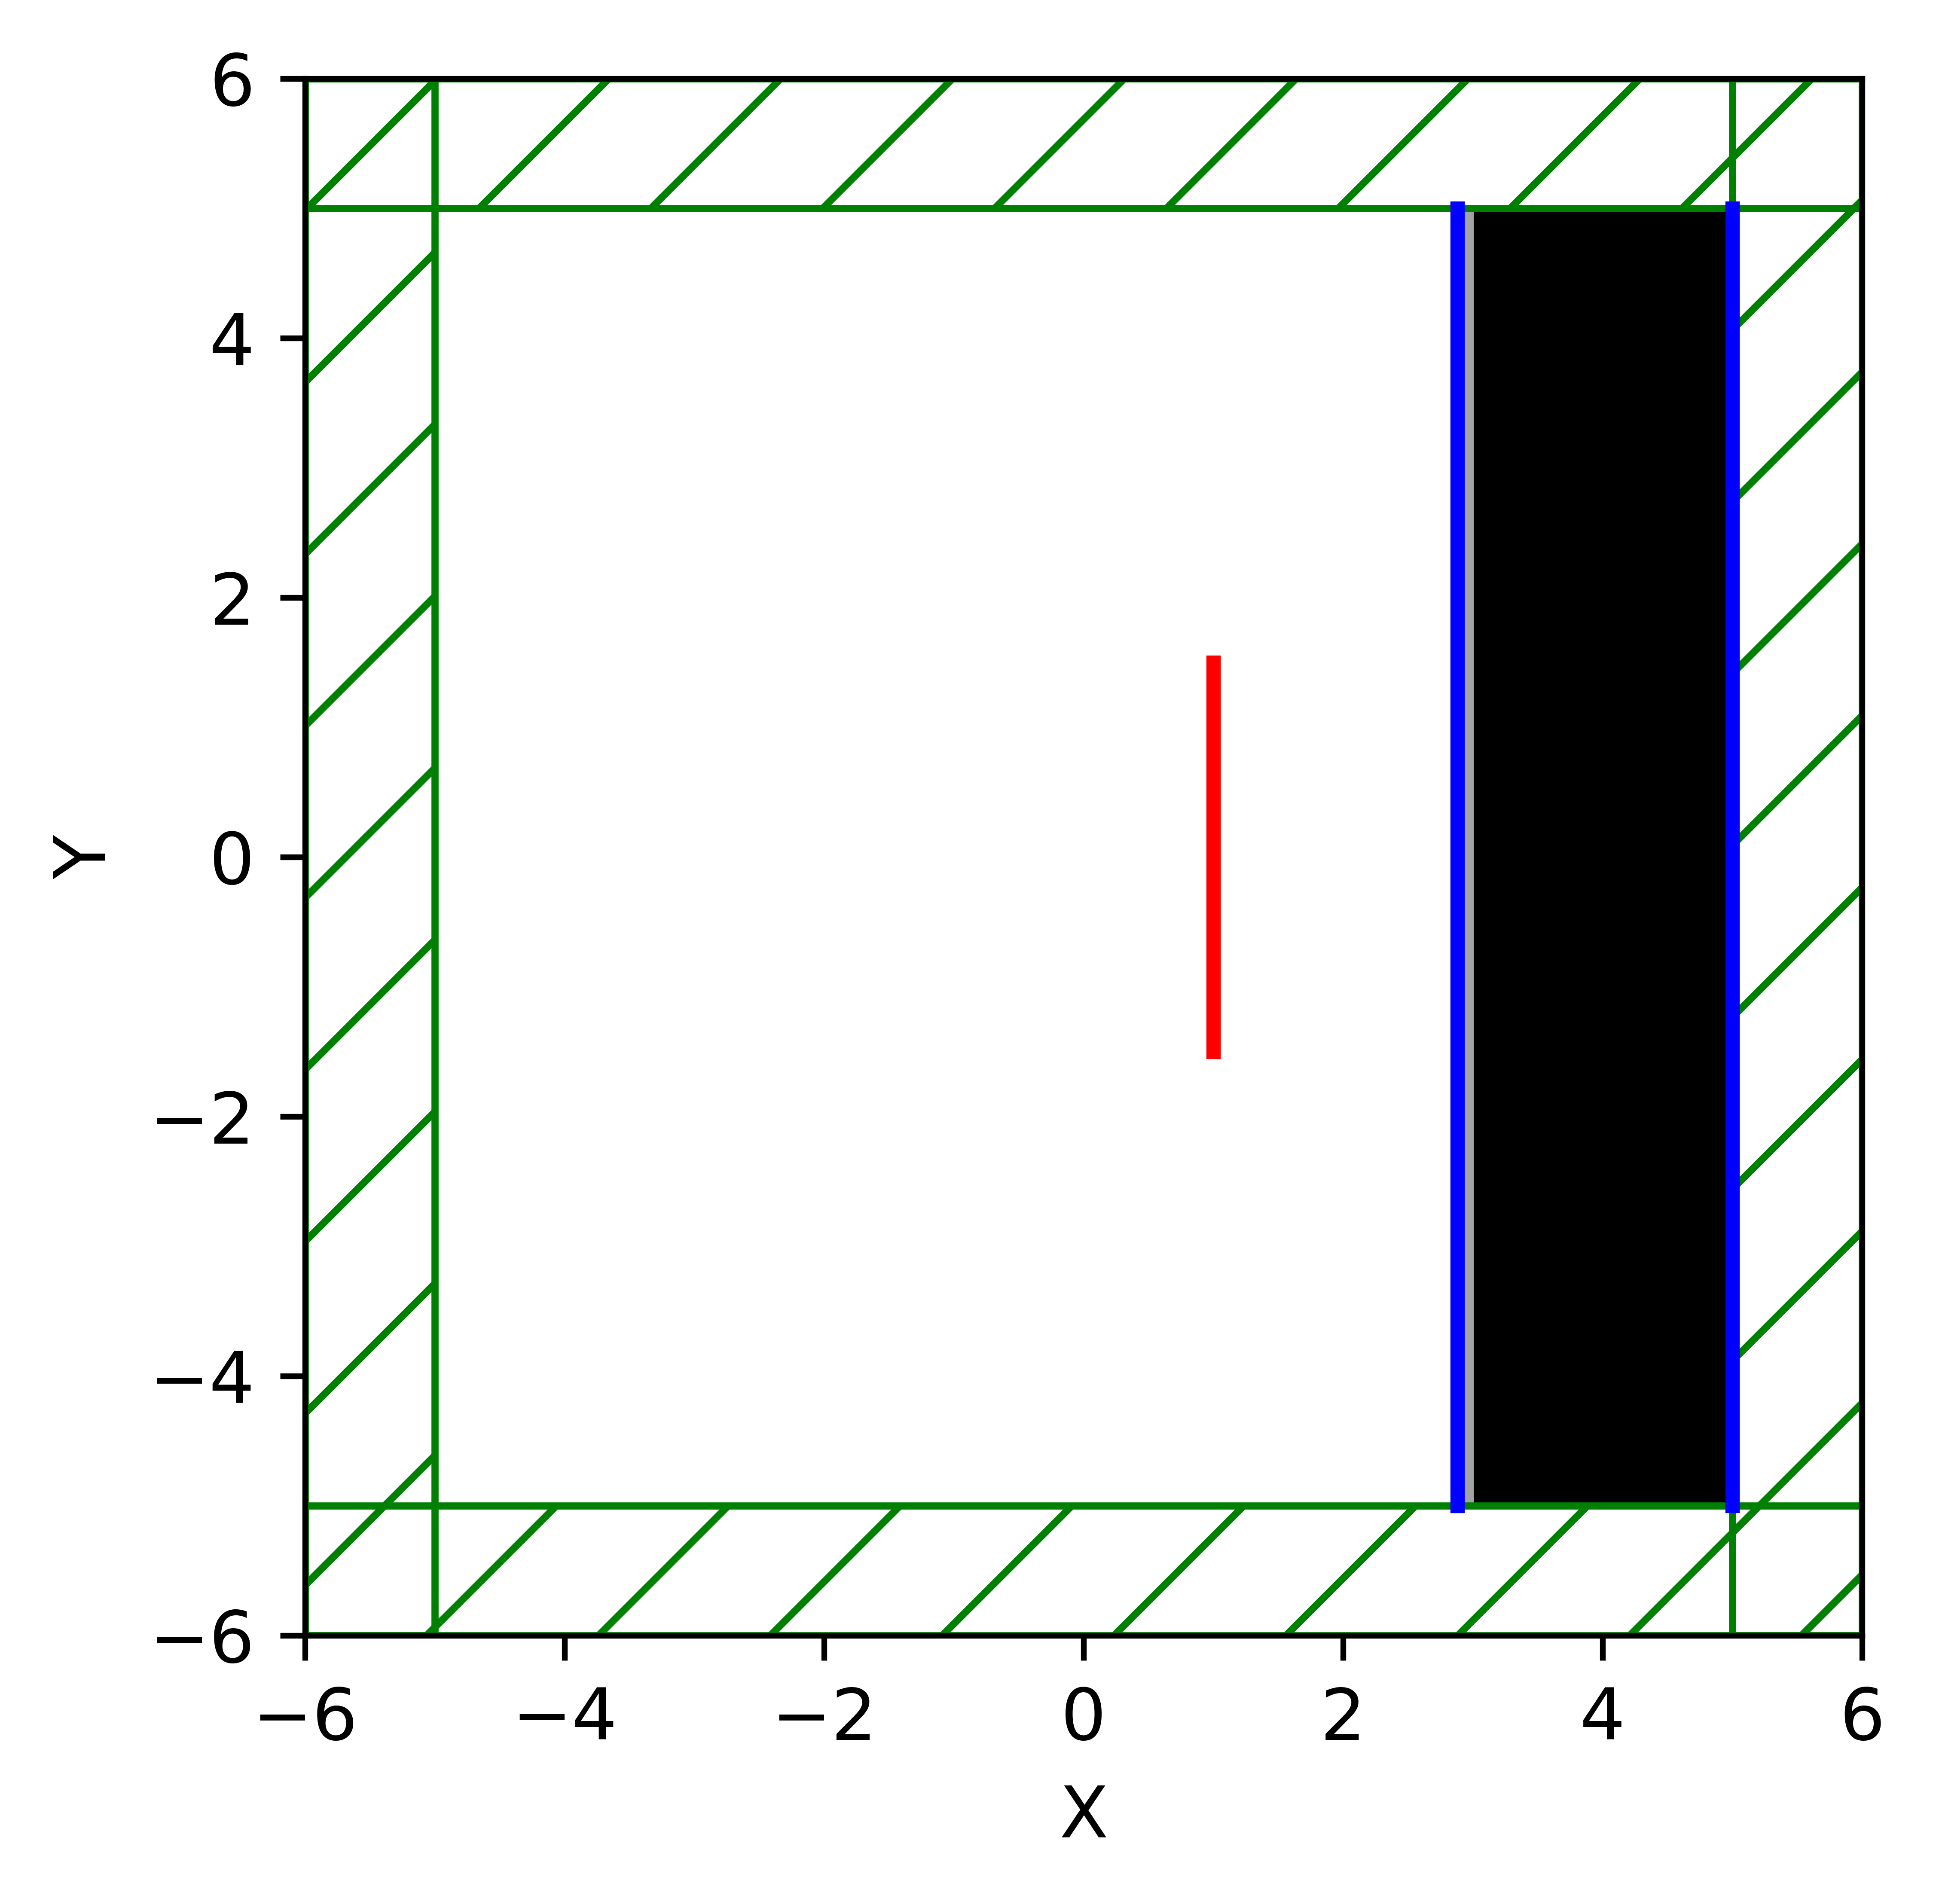

In [8]:
sim.reset_meep()
geometry = [mp.Block(
                    size=mp.Vector3(T_Si, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Si, 0),
                    material=cSi
                    ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4)
           ]
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                   )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                                   )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                     )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=1200)
sim.plot2D()
plt.show()




In [ ]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 333 (time=3.33), 0.012024 s/step
on time step 745 (time=7.45), 0.00972317 s/step
on time step 1156 (time=11.56), 0.00976014 s/step
on time step 1581 (time=15.81), 0.00943183 s/step
on time step 1990 (time=19.9), 0.00981032 s/step
on time step 2462 (time=24.62), 0.00848311 s/step
on time step 2941 (time=29.41), 0.00837091 s/step
on time step 3241 (time=32.41), 0.0133487 s/step
on time step 3556 (time=35.56), 0.0127028 s/step
on time step 3820 (time=38.2), 0.0151538 s/step
on time step 4304 (time=43.04), 0.00827467 s/step
on time step 4778 (time=47.78), 0.00844093 s/step
field decay(t = 50.01): 0.0015124455336935877 / 0.0015124455336935877 = 1.0
on time step 5254 (time=52.54), 0.00840513 s/step
on time step 5735 (time=57.35), 0.00831762 s/step
on time step 6216 (time=62.16), 0.00831732 s/step


In [ ]:
#no_ARC_refl_data

In [ ]:
#no_ARC_refl_flux

In [ ]:
#no_ARC_tran_flux

In [ ]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('with_ARC.csv')

In [ ]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption')
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()